<a href="https://colab.research.google.com/github/birdenly/network_analysis/blob/main/U2_Atividade_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Analysis with NetworkX / Parte 1

Network Analysis with networkX using the dataset: https://www.kaggle.com/datasets/tamber/steam-video-games?resource=download

### *Steam Video Games*

<blockquote class="epigraph" style=" padding: 10px">

Steam is the world's most popular PC Gaming hub, with over 6,000 games and a community of millions of gamers. With a massive collection that includes everything from AAA blockbusters to small indie titles, great discovery tools are a highly valuable asset for Steam.
</blockquote>

## Network Basics

## Install NetworkX

In [177]:
!pip install networkx
!pip install adjustText

## Import Libraries

In [178]:
import networkx
import pandas as pd
#pd.set_option('max_rows', 400)
import matplotlib.pyplot as plt
from adjustText import adjust_text

## *Steam Games* Network

The network data used is https://www.kaggle.com/datasets/tamber/steam-video-games?resource=download

| Network Element      | Steam |         
| :-------------: |:-------------:|
| Node    | steamID/Games |
| Edge     | Plays the same game      |
| Float | Decimal Numbers      |  
| Boolean | True/False     |   


For example, the following sentence counts as an "edge" or connection between User1 and User2:

User1 and User2 purcharsed and played Elden Ring

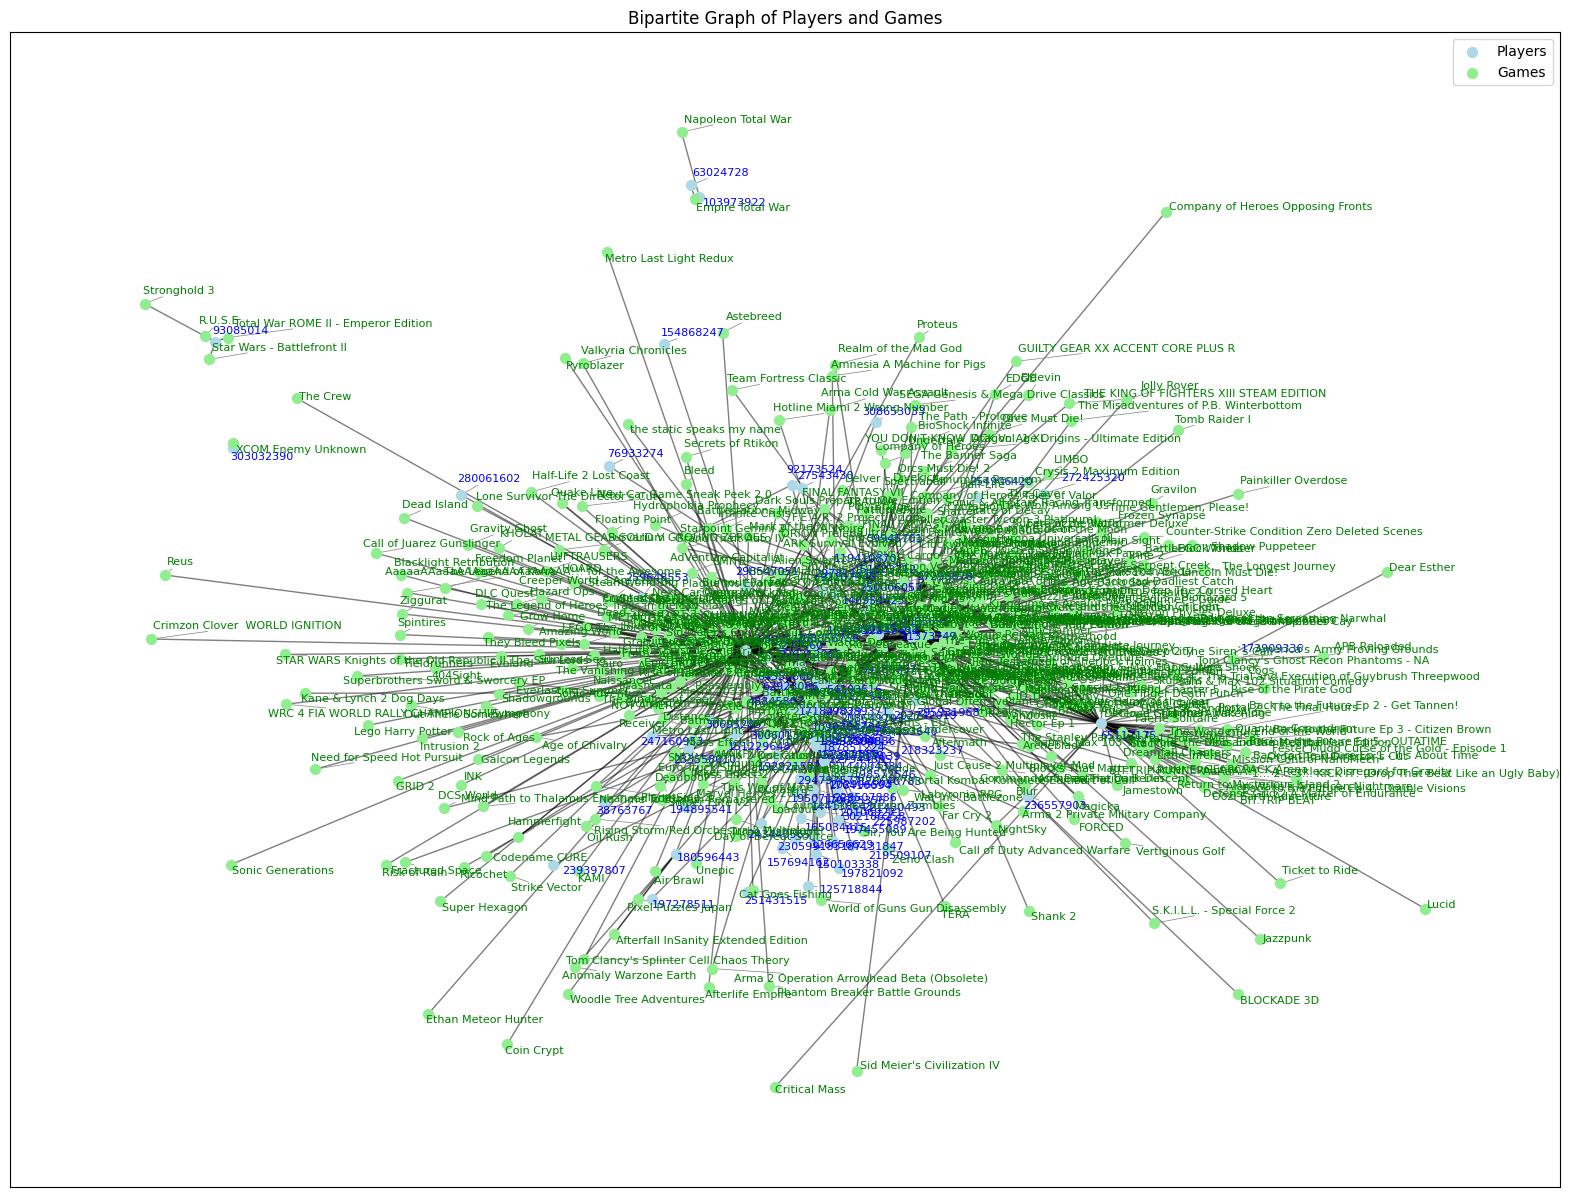

In [179]:
steam = pd.read_csv("https://raw.githubusercontent.com/birdenly/network_analysis/main/steam-200k.csv", header = None, names=["Player_ID", "Game_title", "Behavior", "Hours", "Ignore"],nrows=2500)
steam.head(5)

filtered_steam = steam[steam['Behavior'] == 'play'].drop_duplicates(subset=['Player_ID', 'Game_title'])

B = networkx.Graph()

players = filtered_steam['Player_ID'].unique()
games = filtered_steam['Game_title'].unique()

B.add_nodes_from(players, bipartite=0)
B.add_nodes_from(games, bipartite=1)

for index, row in filtered_steam.iterrows():
    B.add_edge(row['Player_ID'], row['Game_title'], weight=row['Hours'])

plt.figure(figsize=(20, 15))

pos = networkx.spring_layout(B, k=0.1)

networkx.draw_networkx_nodes(B, pos, nodelist=players, node_color='lightblue', node_size=50, label='Players')
networkx.draw_networkx_nodes(B, pos, nodelist=games, node_color='lightgreen', node_size=50, label='Games')

networkx.draw_networkx_edges(B, pos, alpha=0.5)

#nome azul para os steamIds (jogadores) se nao verde
texts = []
for node, (x, y) in pos.items():
    if node in players:
        texts.append(plt.text(x, y, str(node), fontsize=8, color='blue'))
    else:
        texts.append(plt.text(x, y, node, fontsize=8, color='green'))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.legend(['Players', 'Games'], loc='upper right')

plt.title('Bipartite Graph of Players and Games')
plt.show()
#grafico com 2500 jogos mostrando aqueles que foram jogados, portanto comprados

In [180]:
steam

Player_ID                  Game_title  Behavior  Hours  Ignore
0     151603712  The Elder Scrolls V Skyrim  purchase    1.0       0
1     151603712  The Elder Scrolls V Skyrim      play  273.0       0
2     151603712                   Fallout 4  purchase    1.0       0
3     151603712                   Fallout 4      play   87.0       0
4     151603712                       Spore  purchase    1.0       0
...         ...                         ...       ...    ...     ...
2495  151229648                PlanetSide 2  purchase    1.0       0
2496  151229648                PlanetSide 2      play    6.4       0
2497  151229648          Marvel Heroes 2015  purchase    1.0       0
2498  151229648          Marvel Heroes 2015      play    4.6       0
2499  151229648               Left 4 Dead 2  purchase    1.0       0

[2500 rows x 5 columns]

## Create a Network From a Pandas DataFrame

In [181]:
G = networkx.from_pandas_edgelist(steam, source='Player_ID', target='Game_title', edge_attr='Behavior')

## Output a Network File

In [182]:
networkx.write_graphml(G, 'steam.graphml')

## Draw a Simple Network

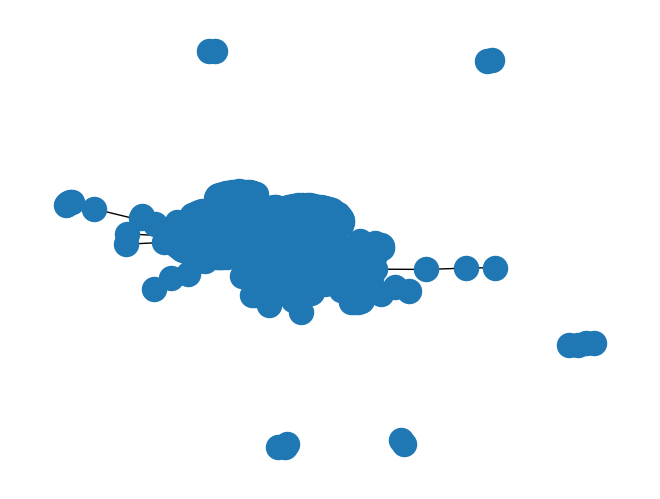

In [183]:
networkx.draw(G)

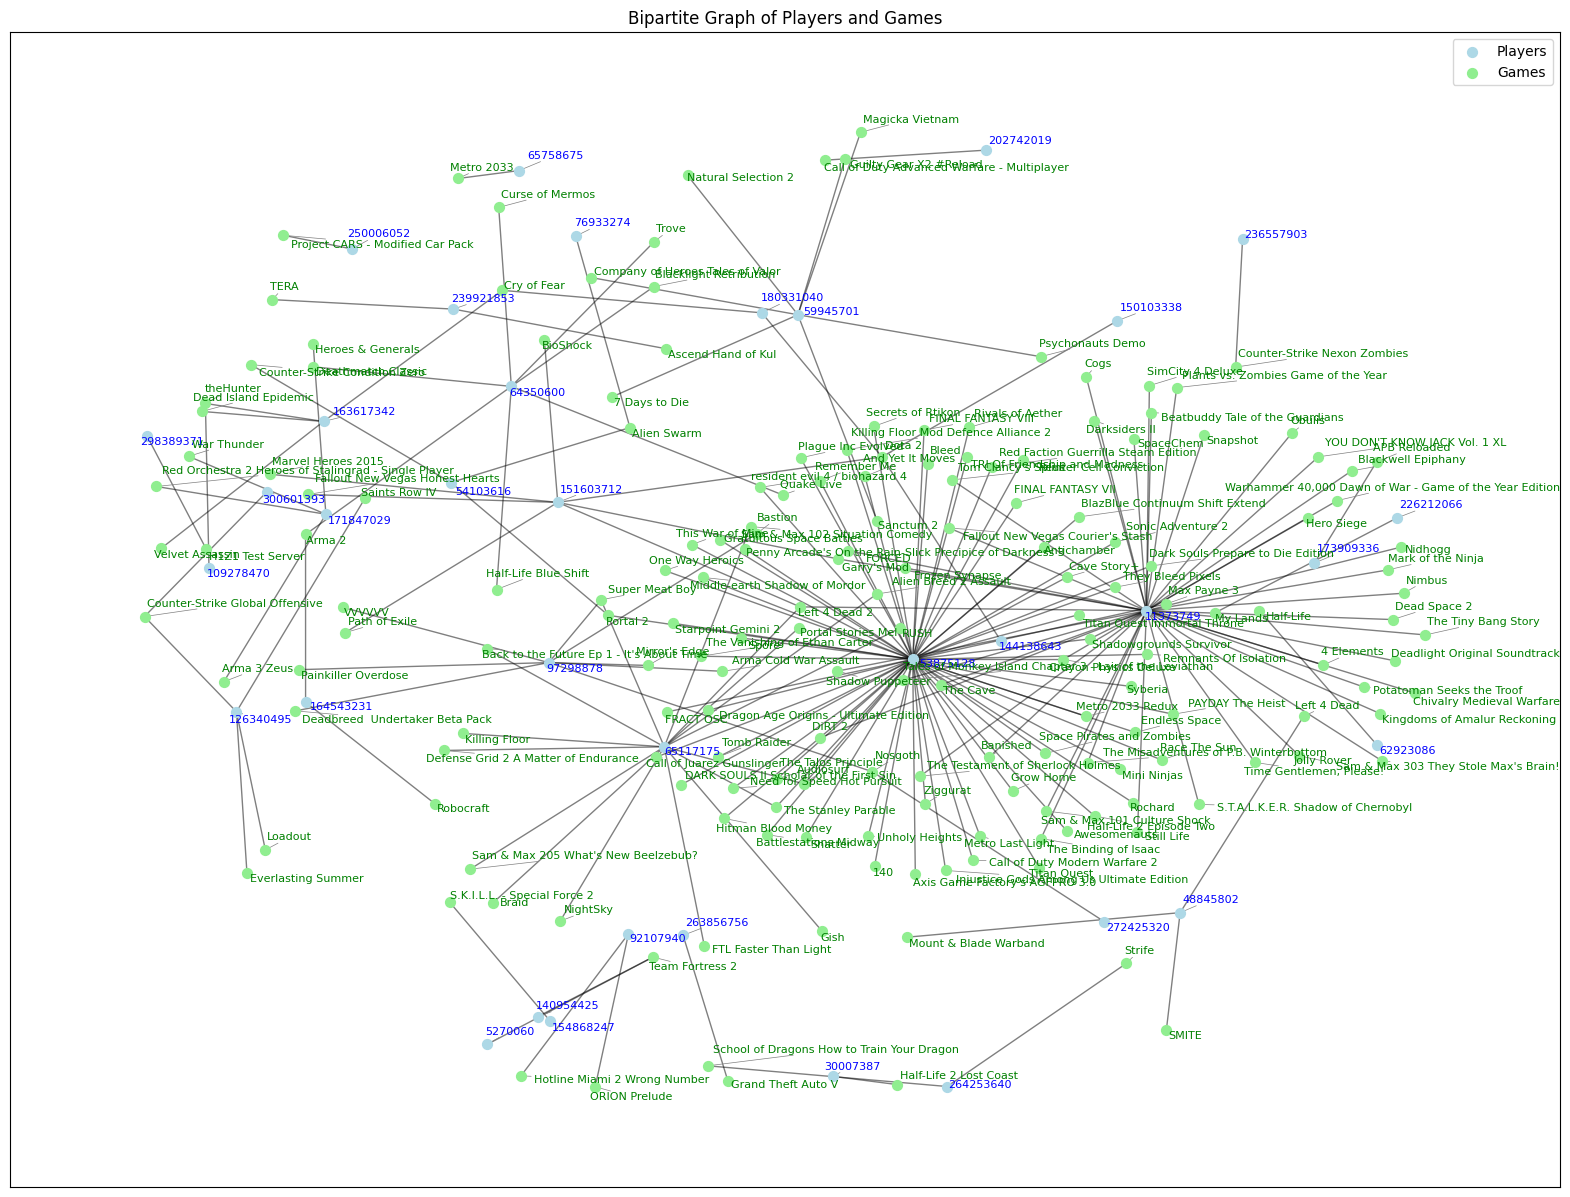

In [184]:
steam_sorted = steam.sort_values(by=['Behavior'], ascending=False)

filtered_steam = steam_sorted.drop_duplicates(subset=['Player_ID', 'Game_title'])

filtered_steam_sample = filtered_steam.sample(n=200)

B = networkx.Graph()

players = filtered_steam_sample['Player_ID'].unique()
games = filtered_steam_sample['Game_title'].unique()

B.add_nodes_from(players, bipartite=0)
B.add_nodes_from(games, bipartite=1)

for index, row in filtered_steam_sample.iterrows():
    B.add_edge(row['Player_ID'], row['Game_title'])

plt.figure(figsize=(20, 15))

pos = networkx.spring_layout(B, k=0.3)

networkx.draw_networkx_nodes(B, pos, nodelist=players, node_color='lightblue', node_size=50, label='Players')
networkx.draw_networkx_nodes(B, pos, nodelist=games, node_color='lightgreen', node_size=50, label='Games')

networkx.draw_networkx_edges(B, pos, alpha=0.5)

#nome azul para os steamIds (jogadores) se nao verde
texts = []
for node, (x, y) in pos.items():
    if node in players:
        texts.append(plt.text(x, y, str(node), fontsize=8, color='blue'))
    else:
        texts.append(plt.text(x, y, node, fontsize=8, color='green'))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.legend(['Players', 'Games'], loc='upper right')

plt.title('Bipartite Graph of Players and Games')
plt.show()
#grafico organizado com sample de 200 mostrando aqueles que foram jogados como também aqueles que foram apenas foram comprados

## Calculate Degree

Who has the most number of connections in the network?

In [185]:
networkx.degree(G)

DegreeView({151603712: 40, 'The Elder Scrolls V Skyrim': 7, 'Fallout 4': 1, 'Spore': 2, 'Fallout New Vegas': 4, 'Left 4 Dead 2': 10, 'HuniePop': 1, 'Path of Exile': 2, 'Poly Bridge': 1, 'Left 4 Dead': 5, 'Team Fortress 2': 23, 'Tomb Raider': 4, 'The Banner Saga': 2, 'Dead Island Epidemic': 7, 'BioShock Infinite': 4, 'Dragon Age Origins - Ultimate Edition': 2, 'Fallout 3 - Game of the Year Edition': 2, 'SEGA Genesis & Mega Drive Classics': 1, 'Grand Theft Auto IV': 2, 'Realm of the Mad God': 2, 'Marvel Heroes 2015': 3, 'Eldevin': 1, 'Dota 2': 51, 'BioShock': 3, 'Robocraft': 4, "Garry's Mod": 7, 'Jazzpunk': 2, 'Alan Wake': 3, 'BioShock 2': 3, 'Fallen Earth': 1, "Fallout New Vegas Courier's Stash": 4, 'Fallout New Vegas Dead Money': 4, 'Fallout New Vegas Honest Hearts': 4, 'Grand Theft Auto Episodes from Liberty City': 2, 'Hitman Absolution': 3, 'HuniePop Official Digital Art Collection': 1, 'HuniePop Original Soundtrack': 1, 'The Banner Saga - Mod Content': 2, 'The Elder Scrolls V Skyrim

Make the degree values a `dict`ionary, then add it as a network "attribute" with `networkx.set_node_attributes()`

In [186]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

Make a Pandas dataframe from the degree data `G.nodes(data='degree')`, then sort from highest to lowest

In [187]:
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

node  degree
78                53875128     505
772               11373749     455
680               65117175     127
605               97298878      67
22                  Dota 2      51
...                    ...     ...
623          Eets Munchies       1
624                Enclave       1
625          GTR Evolution       1
626   Indie Game The Movie       1
1138          PlanetSide 2       1

[1139 rows x 2 columns]

Plot the nodes with the highest degree values

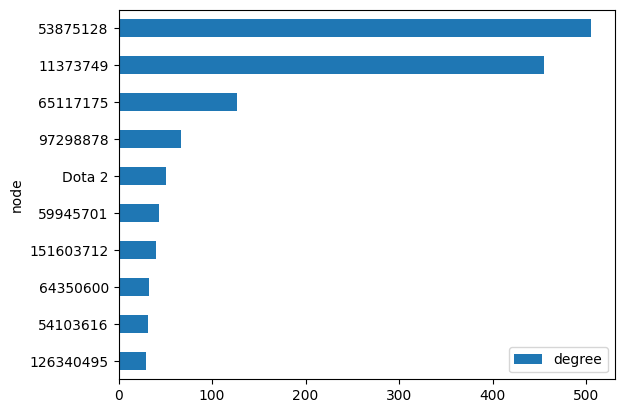

In [188]:
num_nodes_to_inspect = 10
degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh').invert_yaxis()

## Calculate Weighted Degree

Who has the most number of connections in the network (if you factor in edge weight)?

In [189]:
networkx.degree(G, weight='Weight')

DegreeView({151603712: 40, 'The Elder Scrolls V Skyrim': 7, 'Fallout 4': 1, 'Spore': 2, 'Fallout New Vegas': 4, 'Left 4 Dead 2': 10, 'HuniePop': 1, 'Path of Exile': 2, 'Poly Bridge': 1, 'Left 4 Dead': 5, 'Team Fortress 2': 23, 'Tomb Raider': 4, 'The Banner Saga': 2, 'Dead Island Epidemic': 7, 'BioShock Infinite': 4, 'Dragon Age Origins - Ultimate Edition': 2, 'Fallout 3 - Game of the Year Edition': 2, 'SEGA Genesis & Mega Drive Classics': 1, 'Grand Theft Auto IV': 2, 'Realm of the Mad God': 2, 'Marvel Heroes 2015': 3, 'Eldevin': 1, 'Dota 2': 51, 'BioShock': 3, 'Robocraft': 4, "Garry's Mod": 7, 'Jazzpunk': 2, 'Alan Wake': 3, 'BioShock 2': 3, 'Fallen Earth': 1, "Fallout New Vegas Courier's Stash": 4, 'Fallout New Vegas Dead Money': 4, 'Fallout New Vegas Honest Hearts': 4, 'Grand Theft Auto Episodes from Liberty City': 2, 'Hitman Absolution': 3, 'HuniePop Official Digital Art Collection': 1, 'HuniePop Original Soundtrack': 1, 'The Banner Saga - Mod Content': 2, 'The Elder Scrolls V Skyrim

Make the weighted degree values a `dict`ionary, then add it as a network "attribute" with `networkx.set_node_attributes()`

In [199]:
for index, row in filtered_steam.iterrows():
    B.add_edge(row['Player_ID'], row['Game_title'], weight=row['Hours'])
weighted_degrees = {node: sum(data['weight'] for _, _, data in B.edges(node, data=True)) for node in players}
weighted_degrees_df = pd.DataFrame(list(weighted_degrees.items()), columns=['Player_ID', 'Weighted_Degree'])
weighted_degrees_df

Player_ID  Weighted_Degree
0    48845802             15.0
1    53875128            505.0
2    11373749            455.0
3    65117175            127.0
4   163617342             22.0
5    92107940             11.0
6    97298878             67.0
7   264253640             16.0
8    54103616             31.0
9   180331040              4.0
10   76933274              1.0
11  150103338              1.0
12  226212066             13.0
13  140954425              1.0
14  151603712             40.0
15   64350600             33.0
16   59945701             43.0
17  250006052              6.0
18  144138643              1.0
19  298389371              3.0
20    5270060             18.0
21  239921853              6.0
22   62923086              8.0
23  154868247              4.0
24  202742019              4.0
25  164543231             11.0
26  171847029             27.0
27  263856756              3.0
28  126340495             29.0
29  109278470              9.0
30  173909336              5.0
31   65758675              1.0
32   30007387              2.0
33  300601393              2.0
34  236557903              4.0
35  272425320              2.0

Make a Pandas dataframe from the degree data `G.nodes(data='weighted_degree')`, then sort from highest to lowest

In [200]:
weighted_degrees_df.sort_values(by='Weighted_Degree', ascending=False)

Player_ID  Weighted_Degree
1    53875128            505.0
2    11373749            455.0
3    65117175            127.0
6    97298878             67.0
16   59945701             43.0
14  151603712             40.0
15   64350600             33.0
8    54103616             31.0
28  126340495             29.0
26  171847029             27.0
4   163617342             22.0
20    5270060             18.0
7   264253640             16.0
0    48845802             15.0
12  226212066             13.0
25  164543231             11.0
5    92107940             11.0
29  109278470              9.0
22   62923086              8.0
17  250006052              6.0
21  239921853              6.0
30  173909336              5.0
34  236557903              4.0
23  154868247              4.0
24  202742019              4.0
9   180331040              4.0
19  298389371              3.0
27  263856756              3.0
32   30007387              2.0
33  300601393              2.0
35  272425320              2.0
31   65758675              1.0
13  140954425              1.0
11  150103338              1.0
10   76933274              1.0
18  144138643              1.0

## Calculate Betweenness Centrality Scores

Who connects the most other nodes in the network?

In [201]:
networkx.betweenness_centrality(G)

{151603712: 0.026526708640667186,
 'The Elder Scrolls V Skyrim': 0.007901253128982313,
 'Fallout 4': 0.0,
 'Spore': 0.0005295784479143428,
 'Fallout New Vegas': 0.0027921893715016116,
 'Left 4 Dead 2': 0.019963539409043884,
 'HuniePop': 0.0,
 'Path of Exile': 7.243353072798062e-05,
 'Poly Bridge': 0.0,
 'Left 4 Dead': 0.003923089572885322,
 'Team Fortress 2': 0.037939331349685135,
 'Tomb Raider': 0.003737221294836697,
 'The Banner Saga': 0.0005295784479143428,
 'Dead Island Epidemic': 0.010654007436660298,
 'BioShock Infinite': 0.0028056035332645565,
 'Dragon Age Origins - Ultimate Edition': 0.0005295784479143428,
 'Fallout 3 - Game of the Year Edition': 0.0003445951837836176,
 'SEGA Genesis & Mega Drive Classics': 0.0,
 'Grand Theft Auto IV': 0.0005295784479143428,
 'Realm of the Mad God': 5.796022665143194e-05,
 'Marvel Heroes 2015': 0.00036834017299659447,
 'Eldevin': 0.0,
 'Dota 2': 0.10422841883123456,
 'BioShock': 0.001947983900424621,
 'Robocraft': 0.0003318417996574277,
 "Garry

In [202]:
betweenness_centrality = networkx.betweenness_centrality(G)

Add `betweenness_centrality` (which is already a dictionary) as a network "attribute" with `networkx.set_node_attributes()`

In [203]:
networkx.set_node_attributes(G, name='betweenness', values=betweenness_centrality)

Make a Pandas dataframe from the betweenness data `G.nodes(data='betweenness')`, then sort from highest to lowest

In [204]:
betweenness_df = pd.DataFrame(G.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df

node  betweenness
78               53875128     0.543975
772              11373749     0.510765
680              65117175     0.107393
22                 Dota 2     0.104228
605              97298878     0.057396
...                   ...          ...
219   Out There Somewhere     0.000000
218          Fieldrunners     0.000000
641             198572546     0.000000
642             219509107     0.000000
1138         PlanetSide 2     0.000000

[1139 rows x 2 columns]

Plot the nodes with the highest betweenness centrality scores

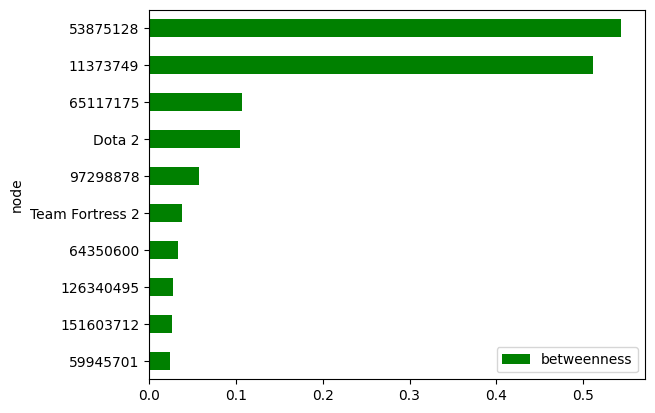

In [205]:
num_nodes_to_inspect = 10
betweenness_df[:num_nodes_to_inspect].plot(x='node', y='betweenness', color='green', kind='barh').invert_yaxis()

## Communities

Who forms distinct communities within this network?

In [206]:
from networkx.algorithms import community

Calculate communities with `community.greedy_modularity_communities()`

In [207]:
# Convert all node identifiers to strings for consistency
G = networkx.relabel_nodes(G, {node: str(node) for node in G.nodes()})

# Now try running the community detection again
communities = community.greedy_modularity_communities(G, weight="Hours")

In [208]:
communities

[frozenset({'11373749',
            '4 Elements',
            '7 Grand Steps, Step 1 What Ancients Begat',
            '9 Clues The Secret of Serpent Creek',
            '92173524',
            '92842632',
            'Abyss The Wraiths of Eden',
            'AirBuccaneers',
            'Alchemy Mysteries Prague Legends',
            'Alice Madness Returns',
            'Aliens vs. Predator',
            'Alter Ego',
            'Always Sometimes Monsters',
            'Anodyne',
            'Anomaly Korea',
            'Antichamber',
            "Assassin's Creed Brotherhood",
            'Aura Fate of the Ages',
            'BEEP',
            'Back to Bed',
            'Banished',
            'BattleBlock Theater',
            'Beatbuddy Tale of the Guardians',
            'Bejeweled 3',
            'Ben There, Dan That!',
            'Beware Planet Earth',
            'Blackwell Epiphany',
            'Blocks That Matter',
            'Blue Toad Murder Files - The Mysteries of Litt

Make a `dict`ionary by looping through the communities and, for each member of the community, adding their community number

In [209]:
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

Add modularity class to the network as an attribute

In [210]:
networkx.set_node_attributes(G, modularity_class, 'modularity_class')

Make a Pandas dataframe from modularity class network data `G.nodes(data='modularity_class')`

In [211]:
communities_df = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)

In [212]:
communities_df

node  modularity_class
1129           303032390                17
1130  XCOM Enemy Unknown                17
1039           214167822                16
1040            Bad Rats                16
1037           211277578                15
...                  ...               ...
850             The Cave                 0
849          Plain Sight                 0
848          Spectraball                 0
847     Penumbra Requiem                 0
789     The Walking Dead                 0

[1139 rows x 2 columns]

Inspect each community in the network

In [213]:
communities_df[communities_df['modularity_class'] == 17]

node  modularity_class
1129           303032390                17
1130  XCOM Enemy Unknown                17

In [214]:
communities_df[communities_df['modularity_class'] == 8]

node  modularity_class
109                 DayZ                 8
165          Mass Effect                 8
1138        PlanetSide 2                 8
424        Mass Effect 2                 8
1137           Starbound                 8
1136               WAKFU                 8
1135           151229648                 8
20    Marvel Heroes 2015                 8

In [215]:
communities_df[communities_df['modularity_class'] == 2]

node  modularity_class
579                              Loadout                 2
1065                           124395695                 2
587                            194895541                 2
1060                           154868247                 2
589                            170625356                 2
...                                  ...               ...
24                             Robocraft                 2
17    SEGA Genesis & Mega Drive Classics                 2
25                           Garry's Mod                 2
26                              Jazzpunk                 2
27                             Alan Wake                 2

[196 rows x 2 columns]

In [216]:
communities_df[communities_df['modularity_class'] == 1]

node  modularity_class
214        Mind Path to Thalamus Enhanced Edition                 1
227  AaaaaAAaaaAAAaaAAAAaAAAAA!!! for the Awesome                 1
211                                     Air Brawl                 1
212                              Cat Goes Fishing                 1
213                        One Finger Death Punch                 1
..                                            ...               ...
434                         Mitsurugi Kamui Hikae                 1
367                                        FarSky                 1
471         Shadowrun Dragonfall - Director's Cut                 1
352                               Devil May Cry 4                 1
472                             Shadowrun Returns                 1

[312 rows x 2 columns]

In [217]:
communities_df[communities_df['modularity_class'] == 0]

node  modularity_class
986           Tomb Raider Underworld                 0
965                  The Bard's Tale                 0
985  Tomb Raider The Last Revelation                 0
964                          Tengami                 0
975           The Maw River Redirect                 0
..                               ...               ...
850                         The Cave                 0
849                      Plain Sight                 0
848                      Spectraball                 0
847                 Penumbra Requiem                 0
789                 The Walking Dead                 0

[333 rows x 2 columns]

Plot a sample of 40 characters with their modularity class indicated by a star

In [218]:
import seaborn as sns

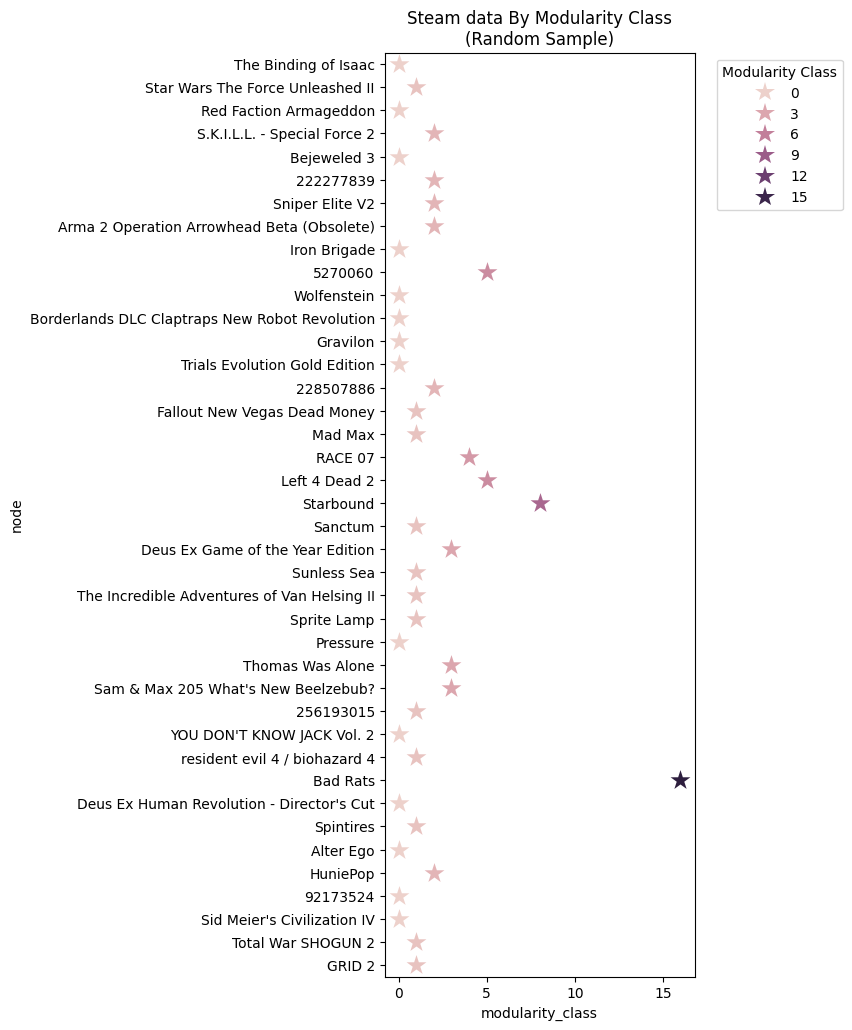

In [219]:
#Set figure size
plt.figure(figsize=(4,12))

#Plot a categorical scatter plot from the dataframe communities_df.sample(40)
ax =sns.stripplot(x='modularity_class', y='node', data=communities_df.sample(40),
              hue='modularity_class', marker='*',size=15)
#Set legend outside the plot with bbox_to_anchor
ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Steam data By Modularity Class\n(Random Sample)")
plt.show()

random 200 samples with their modularity class

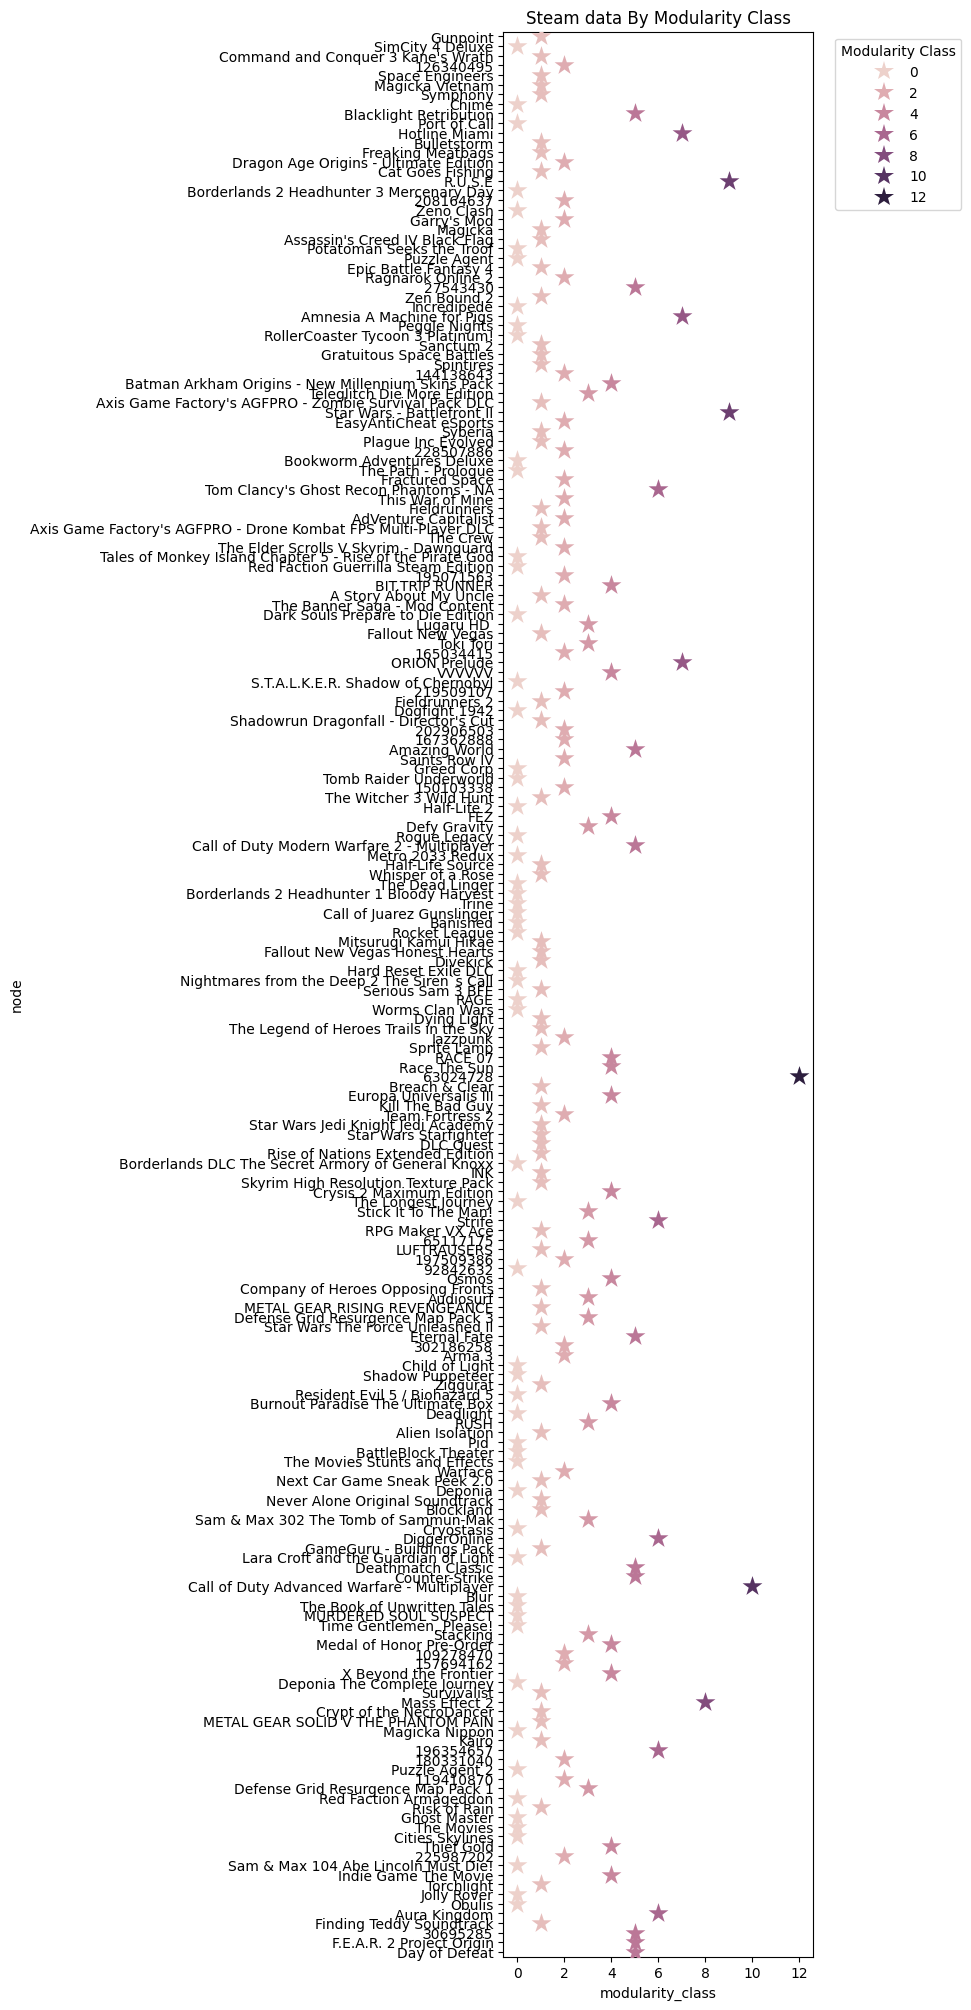

In [220]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df.sample(200),
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Steam data By Modularity Class")
plt.show()

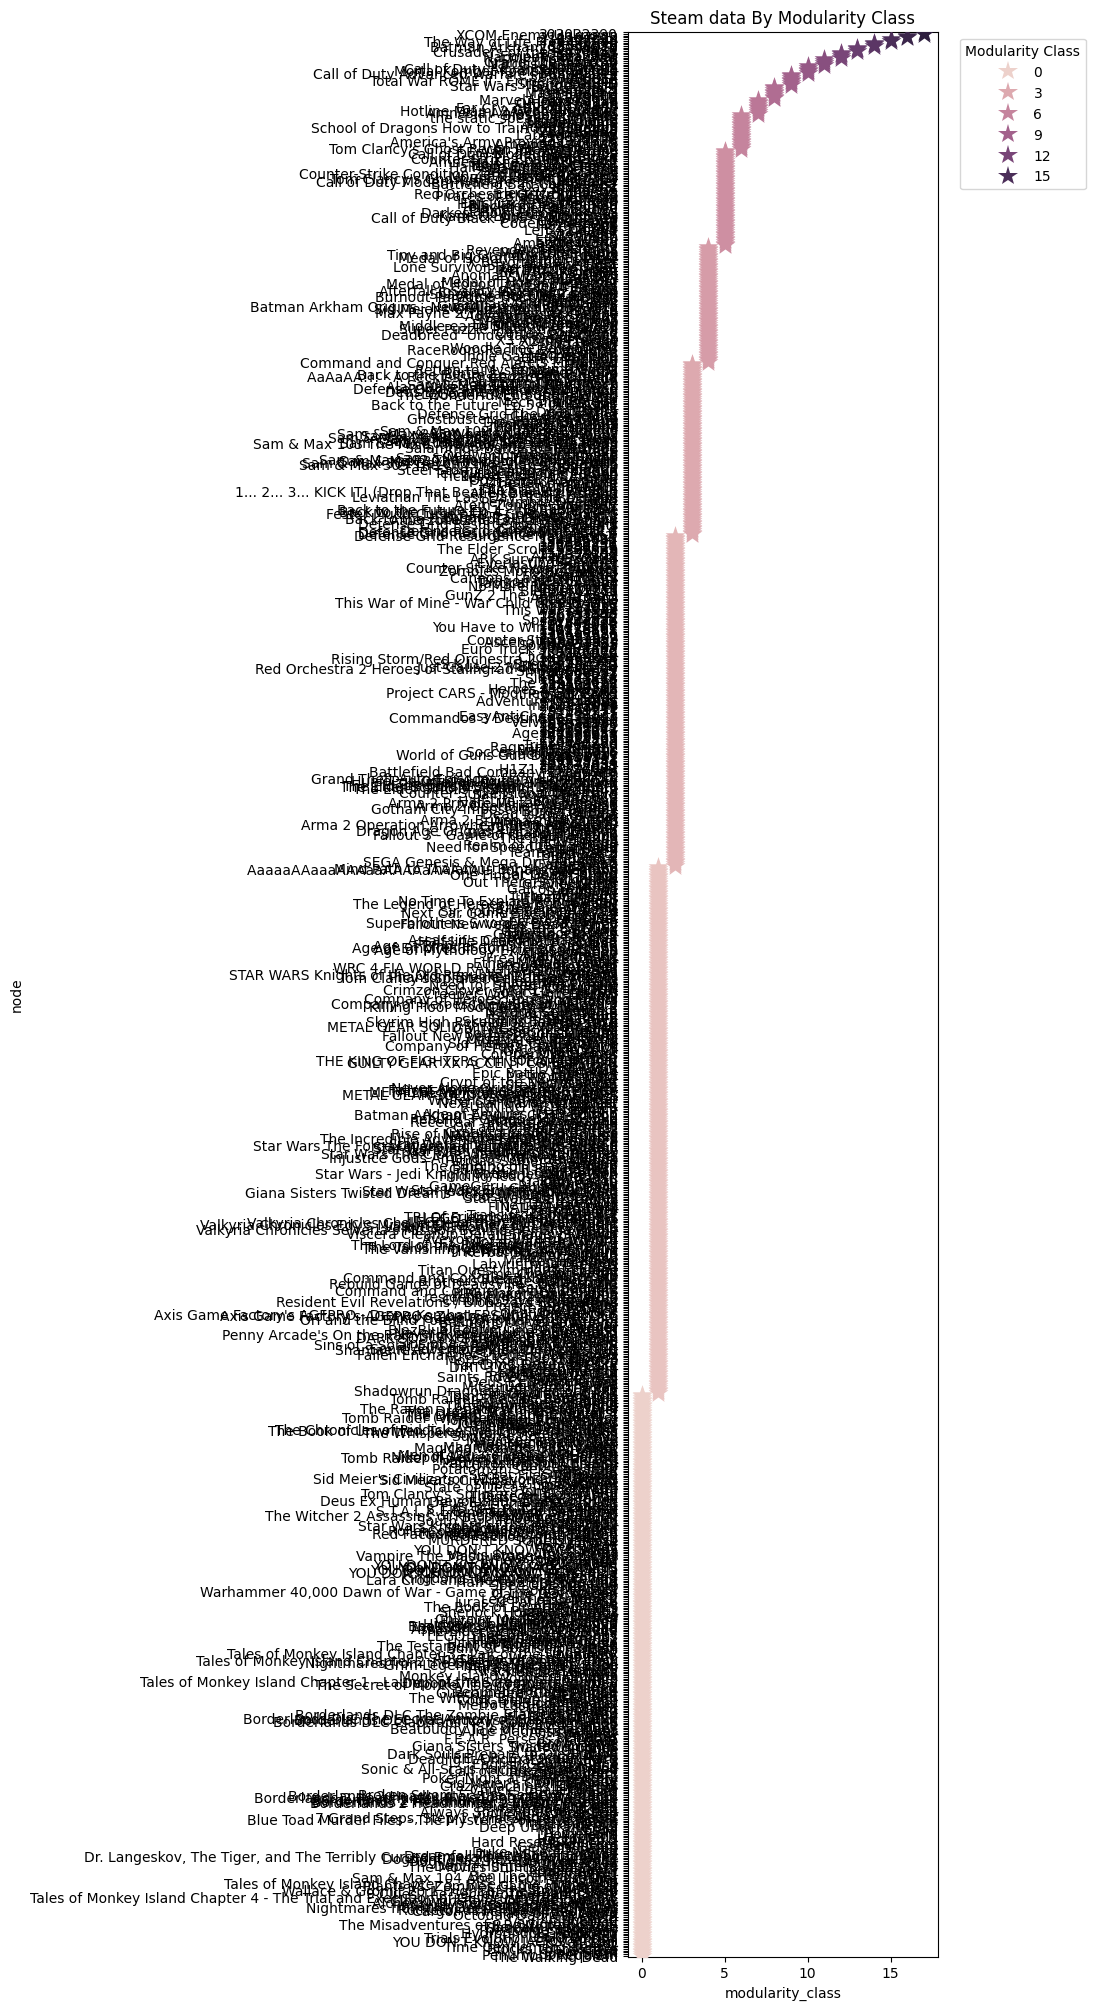

In [221]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Steam data By Modularity Class")
plt.show()

## All Network Metrics

Create a Pandas dataframe of all network attributes by creating a `dict`ionary of `G.nodes(data=True)`...

In [222]:
dict(G.nodes(data=True))

{'151603712': {'degree': 40,
  'betweenness': 0.026526708640667186,
  'modularity_class': 2},
 'The Elder Scrolls V Skyrim': {'degree': 7,
  'betweenness': 0.007901253128982313,
  'modularity_class': 2},
 'Fallout 4': {'degree': 1, 'betweenness': 0.0, 'modularity_class': 2},
 'Spore': {'degree': 2,
  'betweenness': 0.0005295784479143428,
  'modularity_class': 2},
 'Fallout New Vegas': {'degree': 4,
  'betweenness': 0.0027921893715016116,
  'modularity_class': 1},
 'Left 4 Dead 2': {'degree': 10,
  'betweenness': 0.019963539409043884,
  'modularity_class': 5},
 'HuniePop': {'degree': 1, 'betweenness': 0.0, 'modularity_class': 2},
 'Path of Exile': {'degree': 2,
  'betweenness': 7.243353072798062e-05,
  'modularity_class': 2},
 'Poly Bridge': {'degree': 1, 'betweenness': 0.0, 'modularity_class': 2},
 'Left 4 Dead': {'degree': 5,
  'betweenness': 0.003923089572885322,
  'modularity_class': 2},
 'Team Fortress 2': {'degree': 23,
  'betweenness': 0.037939331349685135,
  'modularity_class': 

...and then [transposing it](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.T.html) (flipping the columns and rows) with `.T`

In [223]:
nodes_df = pd.DataFrame(dict(G.nodes(data=True))).T
nodes_df

degree  betweenness  modularity_class
151603712                     40.0     0.026527               2.0
The Elder Scrolls V Skyrim     7.0     0.007901               2.0
Fallout 4                      1.0     0.000000               2.0
Spore                          2.0     0.000530               2.0
Fallout New Vegas              4.0     0.002792               1.0
...                            ...          ...               ...
92173524                       3.0     0.000024               0.0
151229648                     10.0     0.006623               8.0
WAKFU                          1.0     0.000000               8.0
Starbound                      1.0     0.000000               8.0
PlanetSide 2                   1.0     0.000000               8.0

[1139 rows x 3 columns]

In [224]:
nodes_df.sort_values(by='betweenness', ascending=False)

degree  betweenness  modularity_class
53875128              505.0     0.543975               1.0
11373749              455.0     0.510765               0.0
65117175              127.0     0.107393               3.0
Dota 2                 51.0     0.104228               2.0
97298878               67.0     0.057396               4.0
...                     ...          ...               ...
Out There Somewhere     1.0     0.000000               1.0
Fieldrunners            1.0     0.000000               1.0
198572546               1.0     0.000000               2.0
219509107               1.0     0.000000               2.0
PlanetSide 2            1.0     0.000000               8.0

[1139 rows x 3 columns]

# Pyvis / Parte 2


In [225]:
!pip install networkx
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.8 MB/s eta 0:00:00


In [226]:
from pyvis.network import Network
import networkx as nx
G = nx.read_graphml("/content/steam.graphml")
net = Network(notebook=True) #nenhuma das opçoes de cdn_resources funcionam para mim
net.from_nx(G)
net.set_edge_smooth('dynamic')
net.show_buttons(filter_=['nodes', 'edges'])
net.force_atlas_2based(gravity=- 50, central_gravity= 0.05, spring_length= 100,
spring_strength= 0.15)
net.show("steam.html")



steam.html
